---

# CSCI 3202, Fall 2021
# Homework 4
# Due: Friday November 5, 2021 at 6:00 PM

<br> 

### Your name:

<br> 

---

Some useful packages and libraries:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import deque
import heapq
import unittest
from scipy import stats
import copy as cp
from time import time

---

## Problem 1: Bayesian Networks

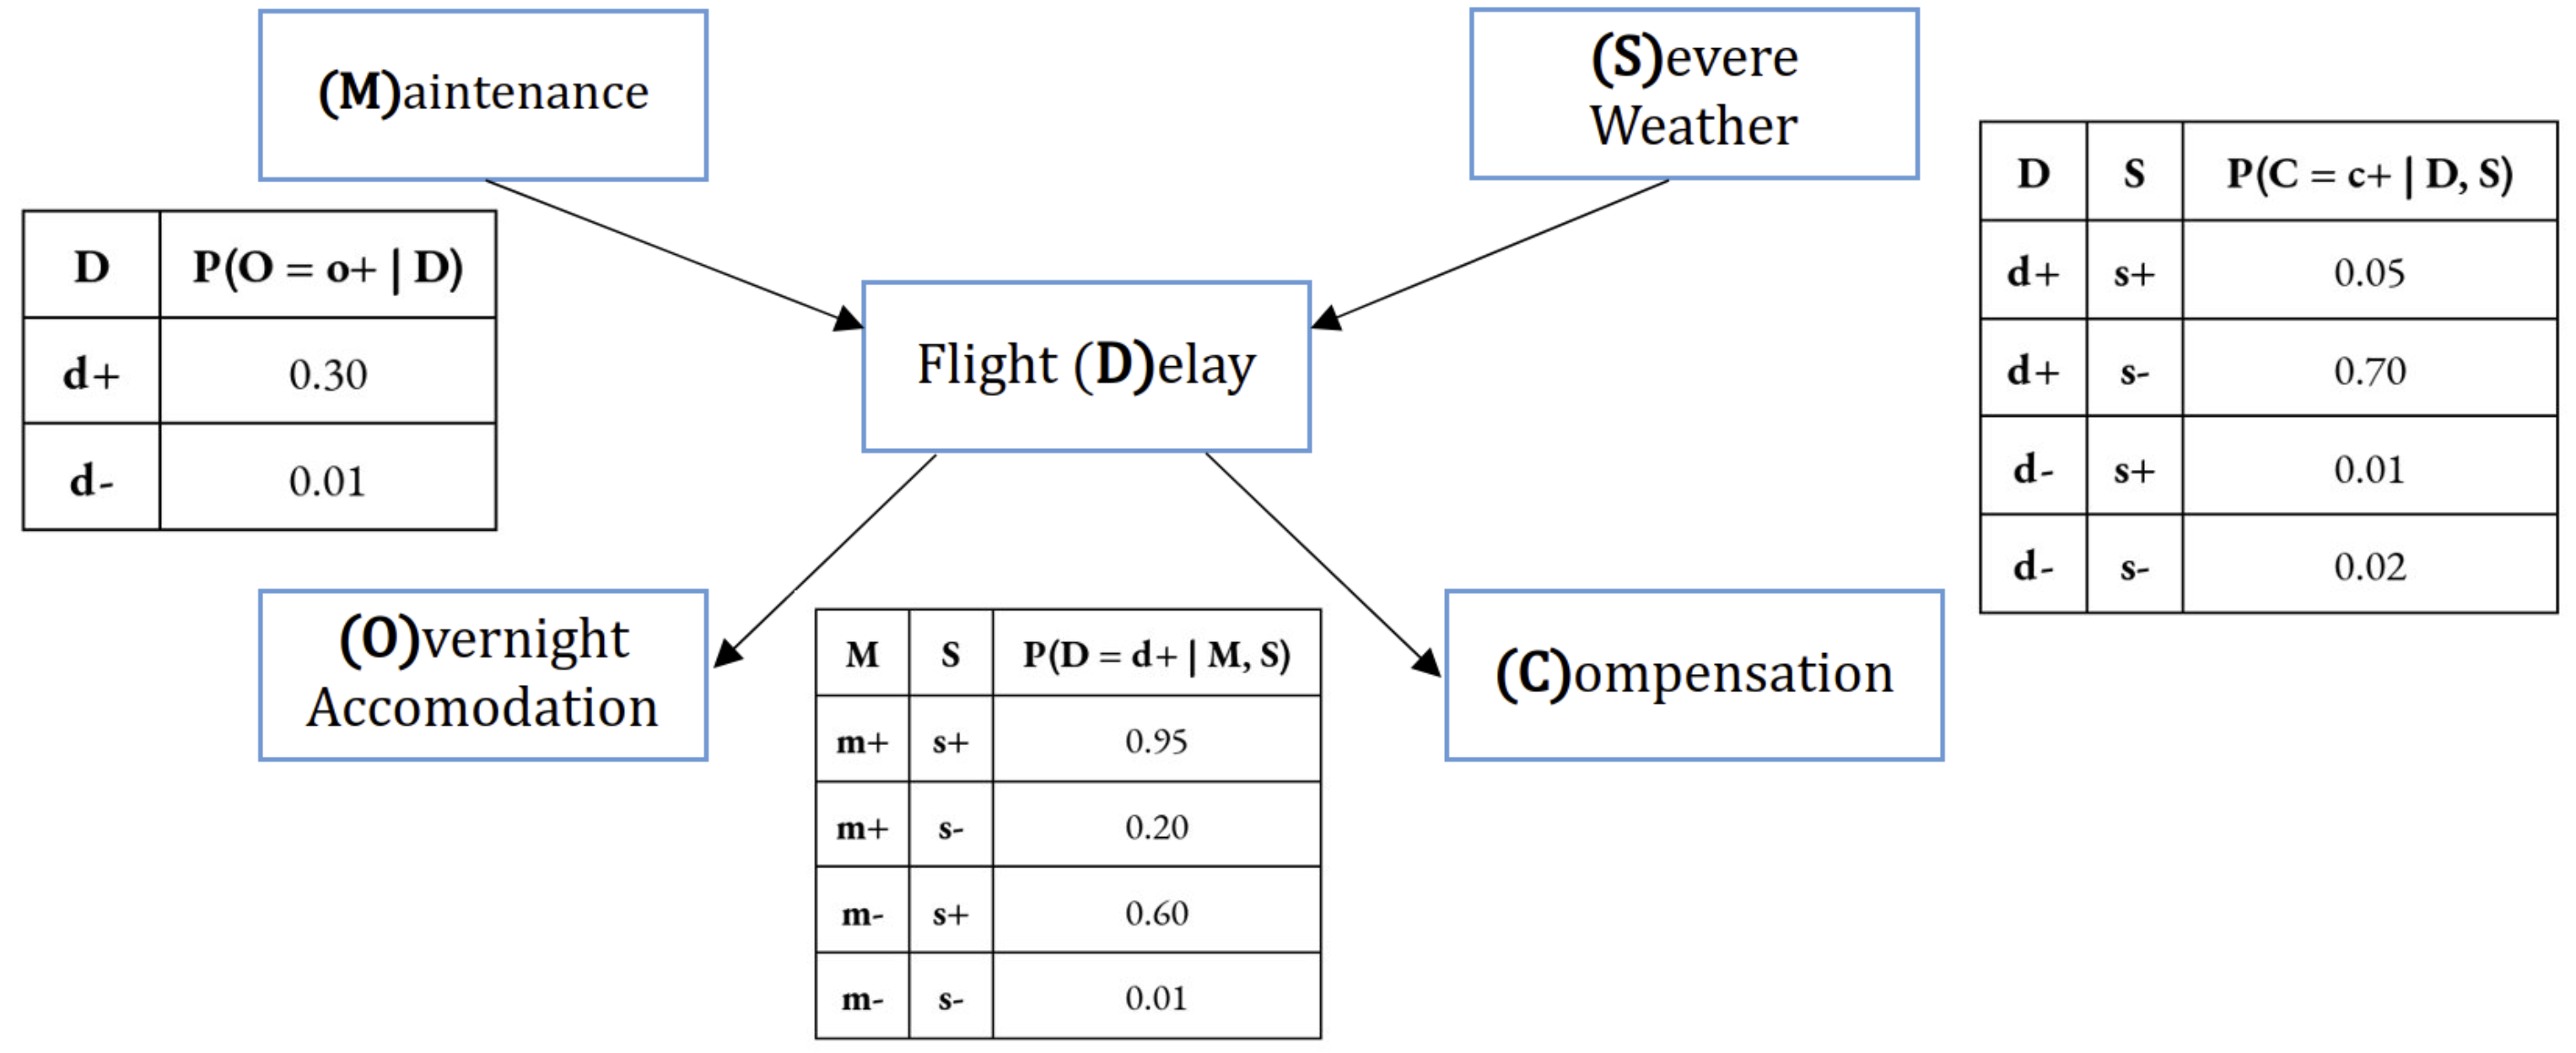


### (1a) 

Create a `BayesNet` object to model this.  Below are the codes for the (conditional) probability `P` function and `BayesNode` class as well, that we used in class on Monday (9 March) to represent the variable nodes and calculate probabilities. You can code this however you want, subject to the following constraints:
1. the nodes are represented using the `BayesNode` class and can work with the `P` function for probabilities,
1. your `BayesNet` structure keeps track of which nodes are in the Bayes net, as well as
1. which nodes are the parents/children of which other nodes.

Some *suggested* codes for a class structure are given. You are free to use these (the code from our in-class notebooks). The point of this exercise is to make sure you understand the example from class. The suggestions for methods to implement are in view of the fact that we will need to calculate some probabilities, which is going to require us to `find_node`s and `find_values` that nodes can take on.

In [2]:
## For the sake of brevity...
T, F = True, False

## From class:
def P(var, value, evidence={}):
    '''The probability distribution for P(var | evidence), 
    when all parent variables are known (in evidence)'''
    if len(var.parents)==1:
        # only one parent
        row = evidence[var.parents[0]]
    else:
        # multiple parents
        row = tuple(evidence[parent] for parent in var.parents)
    return var.cpt[row] if value else 1-var.cpt[row]

## Also from class:
class BayesNode:
    
    def __init__(self, name, parents, values, cpt):
        if isinstance(parents, str):
            parents = parents.split()
            
        if len(parents)==0:
            # if no parents, empty dict key for cpt
            cpt = {(): cpt}
        elif isinstance(cpt, dict):
            # if there is only one parent, only one tuple argument
            if cpt and isinstance(list(cpt.keys())[0], bool):
                cpt = {(v): p for v, p in cpt.items()}

        self.variable = name
        self.parents = parents
        self.cpt = cpt
        self.values = values
        self.children = []
        
    def __repr__(self):
        return repr((self.variable, ' '.join(self.parents)))    

    
##===============================================##
## Suggested skeleton code for a BayesNet class ##
##===============================================##

class BayesNet:
    '''Bayesian network containing only boolean-variable nodes.'''

    def __init__(self, nodes):
        '''Initialize the Bayes net by adding each of the nodes,
        which should be a list BayesNode class objects ordered
        from parents to children (`top` to `bottom`, from causes
        to effects)'''
        
        # your code goes here...
        
                
                
    def add(self, node):
        '''Add a new BayesNode to the BayesNet. The parents should all
        already be in the net, and the variable itself should not be'''
        assert node.variable not in self.variables
        assert all((parent in self.variables) for parent in node.parents)
        
        # your code goes here...
        
            
    def find_node(self, var):
        '''Find and return the BayesNode in the net with name `var`'''
        
        # your code goes here...
        
        
    def find_values(self, var):
        '''Return the set of possible values for variable `var`'''
        
        # your code goes here...

    
    def __repr__(self):
        return 'BayesNet({})'.format(self.nodes)

In [3]:
# Create a Bayes net with those nodes and connections


### (1b)

Craft a function `get_prob(X, e, bn)` to return the **normalized** probability distribution of variable `X` in Bayes net `bn`, given the evidence `e`.  That is, return $P(X \mid e)$. The arguments are:
* `X` is some representation of the variable you are querying the probability distribution of. Either a string (the variable name from the `BayesNode` or a `BayesNode` object itself are good options.
* `e` is some representation of the evidence your probability is conditioned on. When given an empty argument (or `None`) for `e`, `get_prob` should return the marginal distribution $P(X)$.
* `bn` is your `BayesNet` object.

You may do this using the `enumeration` algorithm from class (pseudocode is in the book), or by brute force (i.e., use a few `for` loops). Either way, you should be using your `BayesNet` object to keep track of all the nodes and relationships between nodes so your `get_prob` function knows these things.

In [6]:
# Solution:

class PDF_discrete:
    '''Define a discrete probability distribution function.'''

    def __init__(self, varname='?', freqs=None):
        '''Create a dictionary of values - frequency pairs,
        then normalize the distribution to sum to 1.'''
        self.prob = {}
        self.varname = varname
        self.values = []
        if freqs:
            for (v, p) in freqs.items():
                self[v] = p
        self.normalize()

    def __getitem__(self, value):
        '''Given a value, return P[value]'''
        try:
            return self.prob[value]
        except KeyError:
            return 0

    def __setitem__(self, value, p):
        '''Set P[value] = p, input argument if '''
        if value not in self.values:
            self.values.append(value)
        self.prob[value] = p

    def normalize(self):
        '''Normalize the probability distribution and return it.
        If the sum of PDF values is 0, then return a 0'''
        total = sum(self.prob.values())
        if not np.isclose(total, 1.0):
            for value in self.prob:
                self.prob[value] /= total
        return self
    
def extend(s, var, val):
    """Copy the substitution s and extend it by setting var to val; return copy."""
    s2 = s.copy()
    s2[var] = val
    return s2

def get_prob(X, e, bn):
    '''Return the conditional probability distribution of variable X
    given evidence e, from BayesNet bn. [Figure 14.9]'''
    
    # your code goes here ...


def enumerate_all(variables, e, bn):
    '''Return the sum of those entries in P(variables | e{others})
    consistent with e, where P is the joint distribution represented
    by bn, and e{others} means e restricted to bn's other variables
    (the ones other than variables). Parents must precede children in variables.'''
    if not variables:
        return 1.0
    Y, rest = variables[0], variables[1:]
    Ynode = bn.find_node(Y)
    if Y in e:
        # Y in evidence, so we know its value and just multiply
        return P(Ynode, e[Y], e) * enumerate_all(rest, e, bn)
    else:
        # Y not in evidence so we have to sum (Law of Total Prob.)    
        return sum(P(Ynode, y, e) * enumerate_all(rest, extend(e, Y, y), bn)
                   for y in bn.find_values(Y))

Use your `get_prob` function to calculate the following probabilities. Print them to the screen and compare to the original Bayes net figure given to make sure the output passes these "unit tests".

1. The marginal probability of `Overnight Accomodation` is $P(O=T)=0.0192$
2. The probability of *not* getting `Compensation`, given `Flight Delay` has occured, is $P(C=F \mid D=T)=0.675$
3. The probability of `Flight Delay`, given a plane needs `Maintenance`, but there is a lack of `Severe Weather`, is $P(D=T \mid M=T, S=F)=0.20$

In [6]:
# Your code here

### (1c)

Calculate the probability of observing a `Flight Delay`, $P(D=T)$, *by hand*, showing all work in Markdown/LateX below.

**Verify** your calculation using your `get_prob` function.

In [1]:
# Your code here 

### (1d)

Now calculate the following probabilities using your `get_prob` function.

( i ) The probability of an arbitrary individual recieving `Compensation`, $P(C=T)$

In [2]:
# Your code here

( ii ) The probability that an indivdual does not have a `Flight Delay`, given that the plane requires `Maintenance` $P(D=F\mid M=T)$

In [3]:
# Your code here

( iii ) The probability of an individual recieving overnight accomodation if they have a `Flight Delay` and the plane requires `Maintenance`, $P(O=T \mid D=T, M=T)$

In [4]:
# Your code here

( iv ) The probability that `Severe Weather` has been observed, given that there is a `Flight Delay` $P(S=T \mid D=T)$

In [5]:
# Your code here